In [1]:
import os
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
eeci_colors = ['#E50068','#574145','#009070','#7500a0','#ffbfeb','#00C8A4','#a800e5','#4d4e51','#BEA5A9','#ebf1f7']

In [3]:
sens_results_file = os.path.join('..','results', 'evaluate_tests_cntrl_sens.csv')
sens_results = pd.read_csv(sens_results_file)
nosie_results_file = os.path.join('..','results', 'prediction_tests_cntrl_sens.csv')
noise_results = pd.read_csv(nosie_results_file)

In [4]:
noise_levels = [0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.05, 0.1, 0.2]
columns = ['Overall','Price','Carbon','Grid']

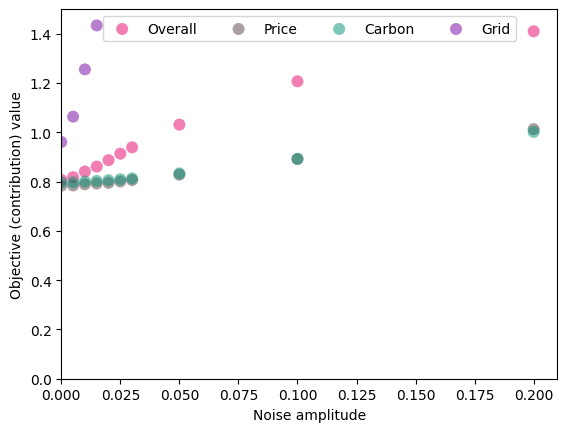

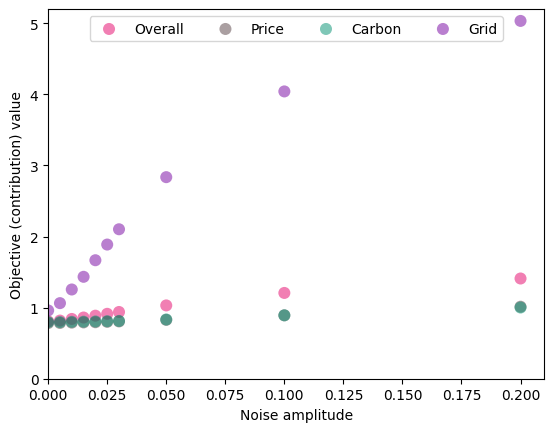

In [13]:
for ymax in [1.5, 5.2]:
    fig, ax = plt.subplots()
    for i, col in enumerate(columns):
        ax.scatter(noise_levels,sens_results[sens_results.Model.str.startswith('noise-all-')][col],label=col,color=eeci_colors[i], alpha=0.5, edgecolors='none',s=75)
    plt.xlim(0)
    plt.ylim(0,ymax)
    plt.xlabel('Noise amplitude')
    plt.ylabel(f'Objective (contribution) value')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fancybox=True)
    plt.show()

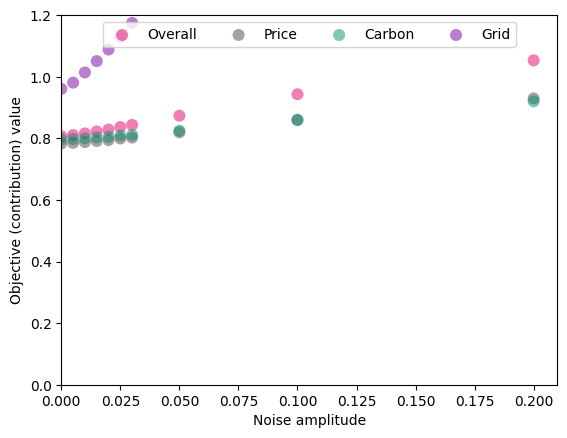

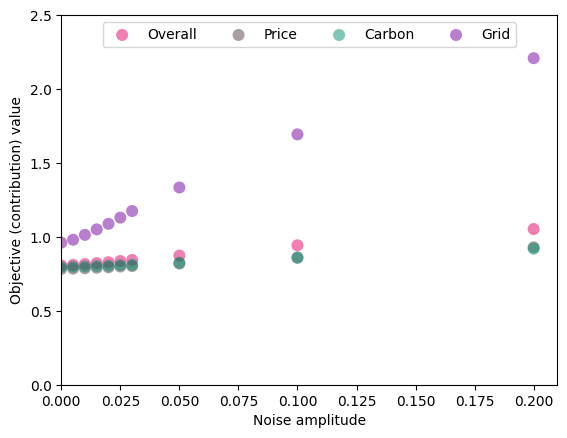

In [15]:
for ymax in [1.2, 2.5]:
    fig, ax = plt.subplots()
    for i, col in enumerate(columns):
        ax.scatter(noise_levels,sens_results[sens_results.Model.str.startswith('noise-load-')][col],label=col,color=eeci_colors[i], alpha=0.5, edgecolors='none',s=75)
    plt.xlim(0)
    plt.ylim(0,ymax)
    plt.xlabel('Noise amplitude')
    plt.ylabel(f'Objective (contribution) value')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fancybox=True)
    plt.show()

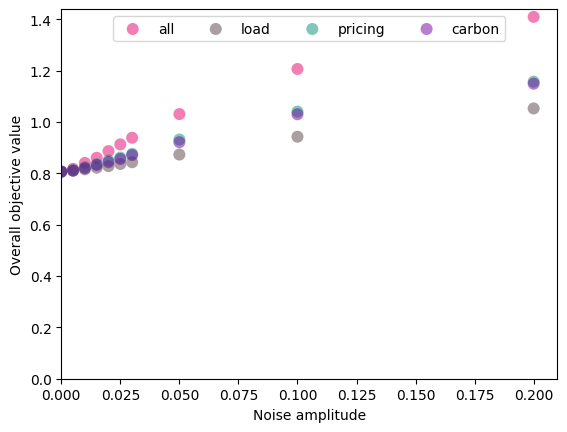

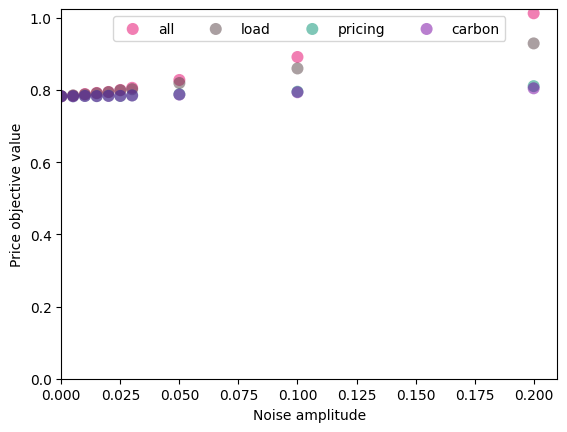

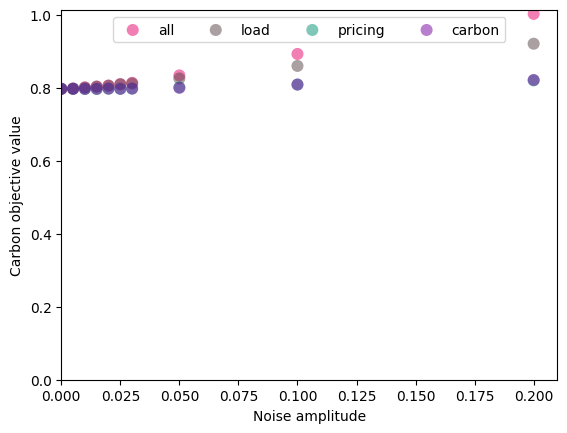

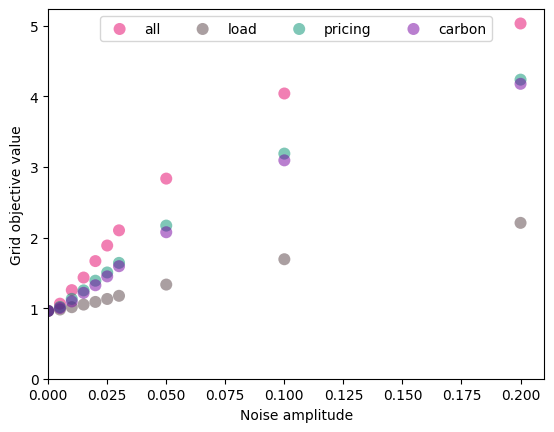

In [20]:
noise_types = ['all','load','pricing','carbon']

for col in columns:
    fig, ax = plt.subplots()
    for i, n in enumerate(noise_types):
        ax.scatter(noise_levels,sens_results[sens_results.Model.str.startswith('noise-%s-'%n)][col],label=n,color=eeci_colors[i], alpha=0.5, edgecolors='none',s=75)
    plt.xlim(0)
    plt.ylim(0)
    plt.xlabel('Noise amplitude')
    plt.ylabel(f'{col} objective value')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fancybox=True)
    plt.show()

In [ ]:
UCam_ids = [0,3,9,11,12,15,16,25,26,32,38,44,45,48,49]
columns = ['P','C',*['L%s'%id for id in UCam_ids]]

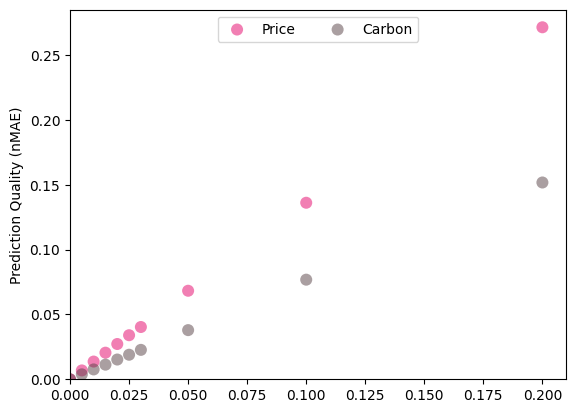

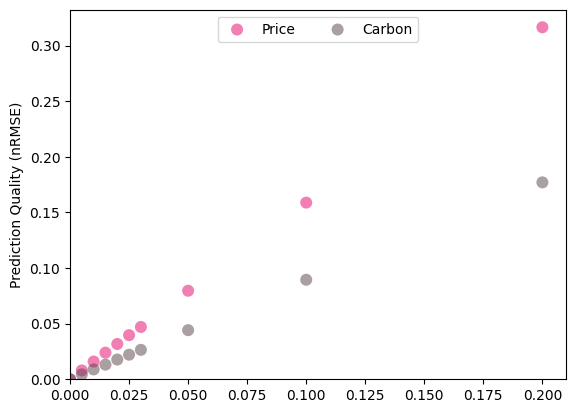

In [40]:
for metric, metric_name in zip(['gmnMAE','gmnRMSE'],['nMAE','nRMSE']):
    fig, ax = plt.subplots()
    for i, (col,col_name) in enumerate(zip(['P','C'],['Price','Carbon'])):
        ax.scatter(noise_levels,noise_results[noise_results['Metric']==metric][col],label=col_name,color=eeci_colors[i], alpha=0.5, edgecolors='none',s=75)
    plt.xlim(0)
    plt.ylim(0)
    plt.ylabel(f'Prediction Quality ({metric_name})')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True)
    plt.show()

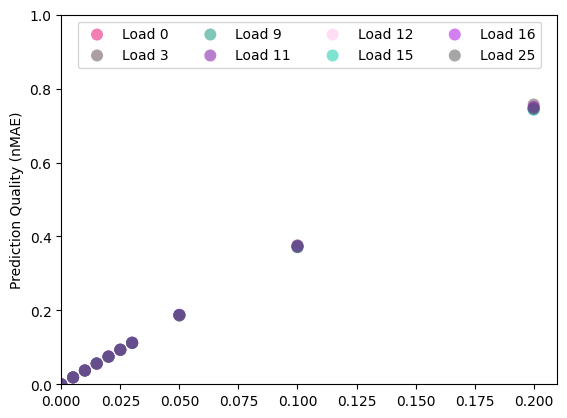

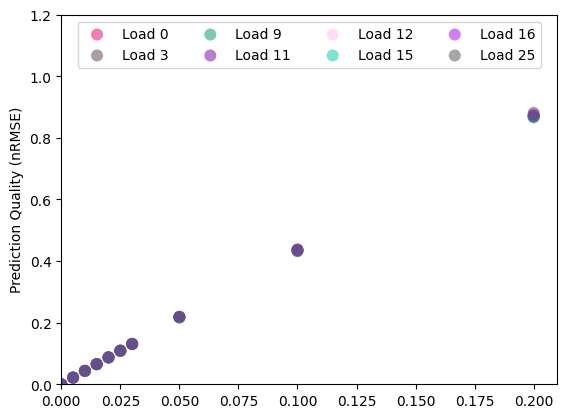

In [48]:
ymaxs = [1,1.2]

for metric, metric_name, ymax in zip(['gmnMAE','gmnRMSE'],['nMAE','nRMSE'],ymaxs):
    fig, ax = plt.subplots()
    for i, (col,col_name) in enumerate(zip(['L%s'%id for id in UCam_ids[:8]],['Load %s'%id for id in UCam_ids[:8]])):
        ax.scatter(noise_levels,noise_results[noise_results['Metric']==metric][col],label=col_name,color=eeci_colors[i], alpha=0.5, edgecolors='none',s=75)
    plt.xlim(0)
    plt.ylim(0,ymax)
    plt.ylabel(f'Prediction Quality ({metric_name})')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fancybox=True)
    plt.show()